In [1]:
import pandas as pd
pd.pandas.set_option("display.max_columns", None)

In [2]:
dataset = pd.read_csv("train.csv")

In [3]:
print(dataset.shape)
print(dataset.head())

(20800, 5)
   id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  


In [4]:
nan_value = dataset.isnull().sum()
nan_value

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [5]:
# dropping the nan values from title
dataset = dataset.dropna()
dataset.shape

(18285, 5)

In [6]:
dataset.reset_index(inplace = True)

In [7]:
dataset.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [8]:
nan_value = dataset.isnull().sum()
nan_value

index     0
id        0
title     0
author    0
text      0
label     0
dtype: int64

In [9]:
title = dataset["title"]
title.head()

0    House Dem Aide: We Didn’t Even See Comey’s Let...
1    FLYNN: Hillary Clinton, Big Woman on Campus - ...
2                    Why the Truth Might Get You Fired
3    15 Civilians Killed In Single US Airstrike Hav...
4    Iranian woman jailed for fictional unpublished...
Name: title, dtype: object

In [10]:
# importing the necessary libraries
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [11]:
stemmer = PorterStemmer()
text_list = []

for i in range(title.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', title[i])
    review = re.sub('\s+', ' ', review)
    review = review.lower()
    review = review.split()
    review = [stemmer.stem(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    text_list.append(review)

In [12]:
text_list[0]

'hous dem aid even see comey letter jason chaffetz tweet'

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000, ngram_range = (1, 3))
input_dataset = cv.fit_transform(text_list).toarray()

In [14]:
print(cv.get_feature_names()[:20])
print(cv.get_params())

C:\Users\ram\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abandon', 'abc', 'abc news', 'abduct', 'abe', 'abedin', 'abl', 'abort', 'abroad', 'absolut', 'abstain', 'absurd', 'abus', 'abus new', 'abus new york', 'academi', 'accept', 'access', 'access pipelin', 'access pipelin protest']
{'analyzer': 'word', 'binary': False, 'decode_error': 'strict', 'dtype': <class 'numpy.int64'>, 'encoding': 'utf-8', 'input': 'content', 'lowercase': True, 'max_df': 1.0, 'max_features': 5000, 'min_df': 1, 'ngram_range': (1, 3), 'preprocessor': None, 'stop_words': None, 'strip_accents': None, 'token_pattern': '(?u)\\b\\w\\w+\\b', 'tokenizer': None, 'vocabulary': None}


In [15]:
input_dataframe = pd.DataFrame(input_dataset)
input_dataframe.head()

0     1     2     3     4     5     6     7     8     9     10    11    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   12    13    14    15    16    17    18    19    20    21    22    23    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   24    25    26    27    28    29    30    31    32    33    34    35    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   36    37    38    39    40    41    42    43    44    45    46    47    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   48    49    50    51    52    53    54    55    56    57    58    59    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   60    61    62    63    64    65    66    67    68    69    70    71    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   72    73    74    75    76    77    78    79    80    81    82    83    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   84    85    86    87    88    89    90    91    92    93    94    95    \
0     0     0     0     0     0     1     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   96    97    98    99    100   101   102   103   104   105   106   107   \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0 

In [16]:
input_dataframe.columns = cv.get_feature_names()
input_dataframe.head()

C:\Users\ram\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


abandon  abc  abc news  abduct  abe  abedin  abl  abort  abroad  absolut  \
0        0    0         0       0    0       0    0      0       0        0   
1        0    0         0       0    0       0    0      0       0        0   
2        0    0         0       0    0       0    0      0       0        0   
3        0    0         0       0    0       0    0      0       0        0   
4        0    0         0       0    0       0    0      0       0        0   

   abstain  absurd  abus  abus new  abus new york  academi  accept  access  \
0        0       0     0         0              0        0       0       0   
1        0       0     0         0              0        0       0       0   
2        0       0     0         0              0        0       0       0   
3        0       0     0         0              0        0       0       0   
4        0       0     0         0              0        0       0       0   

   access pipelin  access pipelin protest  accid  accident  accord  account  \
0               0                       0      0         0       0        0   
1               0                       0      0         0       0        0   
2               0                       0      0         0       0        0   
3               0                       0      0         0       0        0   
4               0                       0      0         0       0        0   

   accus  accus trump  achiev  acknowledg  acknowledg emf  \
0      0            0       0           0               0   
1      0            0       0           0               0   
2      0            0       0           0               0   
3      0            0       0           0               0   
4      0            0       0           0               0   

   acknowledg emf damag  aclu  acquit  acquitt  acr  across  act  act like  \
0                     0     0       0        0    0       0    0         0   
1                     0     0       0        0    0       0    0         0   
2                     0     0       0        0    0       0    0         0   
3                     0     0       0        0    0       0    0         0   
4                     0     0       0        0    0       0    0         0   

   act new  act new york  action  activ  activist  actor  actual  ad  adam  \
0        0             0       0      0         0      0       0   0     0   
1        0             0       0      0         0      0       0   0     0   
2        0             0       0      0         0      0       0   0     0   
3        0             0       0      0         0      0       0   0     0   
4        0             0       0      0         0      0       0   0     0   

   add  addict  address  adhd  admin  administr  admir  admit  adopt  adult  \
0    0       0        0     0      0          0      0      0      0      0   
1    0       0        0     0      0          0      0      0      0      0   
2    0       0        0     0      0          0      0      0      0      0   
3    0       0        0     0      0          0      0      0      0      0   
4    0       0        0     0      0          0      0      0      0      0   

   advanc  advertis  advic  advis  advis new  advis new york  advisor  advoc  \
0       0         0      0      0          0               0        0      0   
1       0         0      0      0          0               0        0      0   
2       0         0      0      0          0               0        0      0   
3       0         0      0      0          0               0        0      0   
4       0         0      0      0          0               0        0      0   

   affair  affect  affili  affirm  afford  afghan  afghanistan  africa  \
0       0       0       0       0       0       0            0       0   
1       0       0       0       0       0       0            0       0   
2       0       0       0       0       0       0            0       0   
3       0       0       0  

In [17]:
y_dataset = dataset["label"]
y_dataset.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [18]:
print(input_dataframe.shape)
print(y_dataset.shape)

(18285, 5000)
(18285,)


In [19]:
# splitting the input data into train-test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_dataframe, y_dataset, test_size = 0.33, random_state = 0)


In [20]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
                          

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### MultiNomial Naive Bayes Classifier

In [22]:
# generating the model

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
NB_model = MultinomialNB()

In [23]:

NB_model.fit(x_train, y_train)
y_pred = NB_model.predict(x_test)
score = accuracy_score(y_test, y_pred)
print("The accuracy of the model is : %0.3f" % score)


The accuracy of the model is : 0.902


Confusion matrix, without normalization


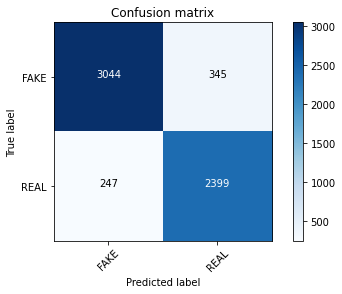

In [24]:
c_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(c_matrix, classes = ["FAKE", "REAL"])

### Passive Aggressive Classifier

In [25]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()

In [26]:
linear_clf.fit(x_train, y_train)
y_prediction = linear_clf.predict(x_test)
score_1 = accuracy_score(y_test, y_prediction)
print("The of the model is : %0.3f" % score_1)


The of the model is : 0.921


Confusion matrix, without normalization


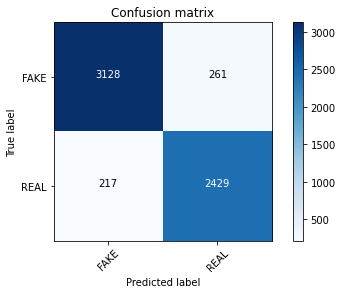

In [27]:
matrix = confusion_matrix(y_test, y_prediction)
plot_confusion_matrix(matrix, classes = ["FAKE", "REAL"])

### Multinomial Classifier with Hyperparameter

In [28]:
classifier=MultinomialNB(alpha=0.1)

In [29]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(x_train,y_train)
    y_pred=sub_classifier.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\ram\AppData\Roaming\Python\Python310\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Alpha: 0.0, Score : 0.8903065451532726
Alpha: 0.1, Score : 0.9020712510356255
Alpha: 0.2, Score : 0.9025683512841757
Alpha: 0.30000000000000004, Score : 0.9024026512013256
Alpha: 0.4, Score : 0.9017398508699255
Alpha: 0.5, Score : 0.9015741507870754
Alpha: 0.6000000000000001, Score : 0.9022369511184756
Alpha: 0.7000000000000001, Score : 0.9025683512841757
Alpha: 0.8, Score : 0.9015741507870754
Alpha: 0.9, Score : 0.9017398508699255
